# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


# Split the dataset into training set and test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train)

[[    27  57000]
 [    46  28000]
 [    39 134000]
 [    44  39000]
 [    57  26000]
 [    32 120000]
 [    41  52000]
 [    48  74000]
 [    26  86000]
 [    22  81000]
 [    49  86000]
 [    36  54000]
 [    40  59000]
 [    41  80000]
 [    26  16000]
 [    39  79000]
 [    59 130000]
 [    42  64000]
 [    53 143000]
 [    34 112000]
 [    57 122000]
 [    39  71000]
 [    47  25000]
 [    24  19000]
 [    36  50000]
 [    32 150000]
 [    48  29000]
 [    30 107000]
 [    60  34000]
 [    38  61000]
 [    33  31000]
 [    39  71000]
 [    55  39000]
 [    49  39000]
 [    43 112000]
 [    27  20000]
 [    26  17000]
 [    37  93000]
 [    42  54000]
 [    35  61000]
 [    29  75000]
 [    38  80000]
 [    45  26000]
 [    54 108000]
 [    46  23000]
 [    23  28000]
 [    37  75000]
 [    42  65000]
 [    35  71000]
 [    51 146000]
 [    39  96000]
 [    24  89000]
 [    58  95000]
 [    25  22000]
 [    41  59000]
 [    28  89000]
 [    42  80000]
 [    42 108000]
 [    46  9600

In [8]:
print(y_train)

[0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0
 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]


In [9]:
print(X_test)

[[    46  22000]
 [    59  88000]
 [    28  44000]
 [    48  96000]
 [    29  28000]
 [    30  62000]
 [    47 107000]
 [    29  83000]
 [    40  75000]
 [    42  65000]
 [    35  65000]
 [    53  34000]
 [    23  48000]
 [    20  23000]
 [    30  87000]
 [    35 108000]
 [    52  38000]
 [    46  74000]
 [    39  42000]
 [    56  60000]
 [    22  27000]
 [    29  80000]
 [    47  23000]
 [    59  76000]
 [    19  19000]
 [    51  23000]
 [    42  80000]
 [    37  53000]
 [    55 125000]
 [    19  21000]
 [    46  41000]
 [    19  70000]
 [    36 144000]
 [    28  79000]
 [    40 107000]
 [    35  75000]
 [    37  55000]
 [    38  65000]
 [    26  30000]
 [    18  68000]
 [    48  33000]
 [    24  55000]
 [    18  52000]
 [    47  20000]
 [    20  49000]
 [    44 139000]
 [    29  61000]
 [    31  71000]
 [    48  41000]
 [    34  43000]
 [    25  79000]
 [    53  82000]
 [    38  55000]
 [    25  80000]
 [    37  80000]
 [    27  31000]
 [    60 102000]
 [    26 118000]
 [    31  7400

In [10]:
print(y_test)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1]


# Feature scaling

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[-1.06675246 -0.38634438]
 [ 0.79753468 -1.22993871]
 [ 0.11069205  1.853544  ]
 [ 0.60129393 -0.90995465]
 [ 1.87685881 -1.28811763]
 [-0.57615058  1.44629156]
 [ 0.3069328  -0.53179168]
 [ 0.99377543  0.10817643]
 [-1.16487283  0.45724994]
 [-1.55735433  0.31180264]
 [ 1.0918958   0.45724994]
 [-0.18366908 -0.47361276]
 [ 0.20881242 -0.32816546]
 [ 0.3069328   0.28271318]
 [-1.16487283 -1.57901222]
 [ 0.11069205  0.25362372]
 [ 2.07309956  1.73718616]
 [ 0.40505317 -0.18271817]
 [ 1.4843773   2.11534913]
 [-0.37990983  1.21357589]
 [ 1.87685881  1.50447048]
 [ 0.11069205  0.02090805]
 [ 0.89565505 -1.31720709]
 [-1.36111358 -1.49174384]
 [-0.18366908 -0.5899706 ]
 [-0.57615058  2.31897535]
 [ 0.99377543 -1.20084925]
 [-0.77239133  1.06812859]
 [ 2.17121993 -1.05540195]
 [ 0.01257167 -0.26998655]
 [-0.4780302  -1.14267033]
 [ 0.11069205  0.02090805]
 [ 1.68061805 -0.90995465]
 [ 1.0918958  -0.90995465]
 [ 0.50317355  1.21357589]
 [-1.06675246 -1.46265438]
 [-1.16487283 -1.54992276]
 

In [13]:
print(X_test)

[[ 0.79753468 -1.40447546]
 [ 2.07309956  0.51542886]
 [-0.96863208 -0.76450736]
 [ 0.99377543  0.74814454]
 [-0.87051171 -1.22993871]
 [-0.77239133 -0.24089709]
 [ 0.89565505  1.06812859]
 [-0.87051171  0.36998156]
 [ 0.20881242  0.13726589]
 [ 0.40505317 -0.15362871]
 [-0.28178945 -0.15362871]
 [ 1.4843773  -1.05540195]
 [-1.45923396 -0.64814952]
 [-1.75359508 -1.37538601]
 [-0.77239133  0.4863394 ]
 [-0.28178945  1.09721805]
 [ 1.38625693 -0.93904411]
 [ 0.79753468  0.10817643]
 [ 0.11069205 -0.82268628]
 [ 1.77873843 -0.29907601]
 [-1.55735433 -1.25902817]
 [-0.87051171  0.28271318]
 [ 0.89565505 -1.37538601]
 [ 2.07309956  0.16635535]
 [-1.85171546 -1.49174384]
 [ 1.28813655 -1.37538601]
 [ 0.40505317  0.28271318]
 [-0.0855487  -0.50270222]
 [ 1.68061805  1.59173886]
 [-1.85171546 -1.43356492]
 [ 0.79753468 -0.85177573]
 [-1.85171546 -0.00818141]
 [-0.18366908  2.14443859]
 [-0.96863208  0.25362372]
 [ 0.20881242  1.06812859]
 [-0.28178945  0.13726589]
 [-0.0855487  -0.4445233 ]
 

# Training the SVM model on the training dataset

In [14]:
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Predicting a new result

In [15]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# Predicting the test set results

In [16]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]]


# Making the confusion matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[50  2]
 [ 9 19]]


0.8625

# Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


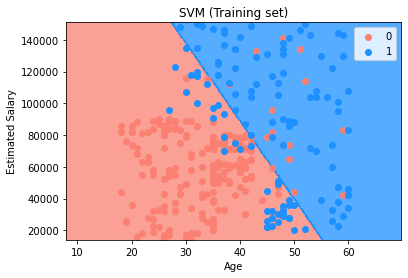

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

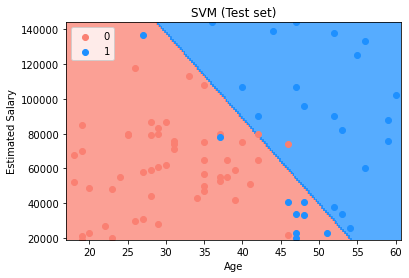

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create a grid of points
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
)
# Predict for each point on the grid
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=j
    )
# Add titles and labels
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()